# exploring the dataset

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


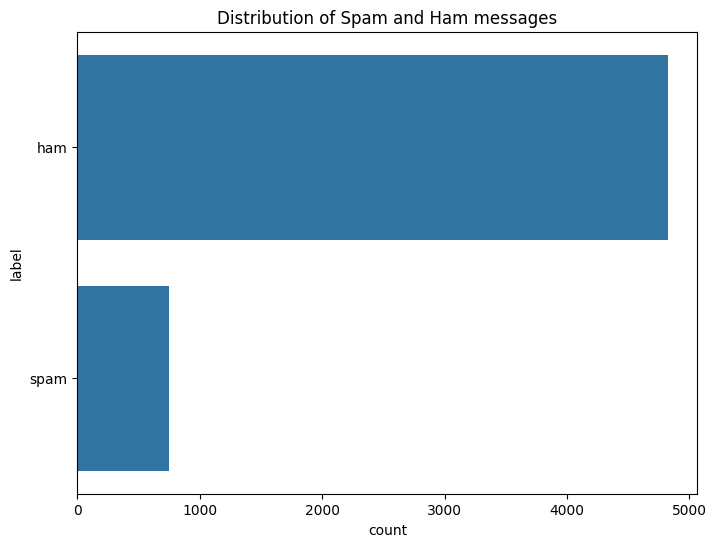

In [23]:
# install packages 
!!pip install pandas
!!pip install matplotlib
!!pip install seaborn
!!pip install scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Drop unnecessary columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Display the first few rows
print(df.head())

# Visualize the distribution of spam vs. ham
plt.figure(figsize=(8, 6))
sns.countplot(df['label'])
plt.title('Distribution of Spam and Ham messages')
plt.show()

# Preprocessing the dataset

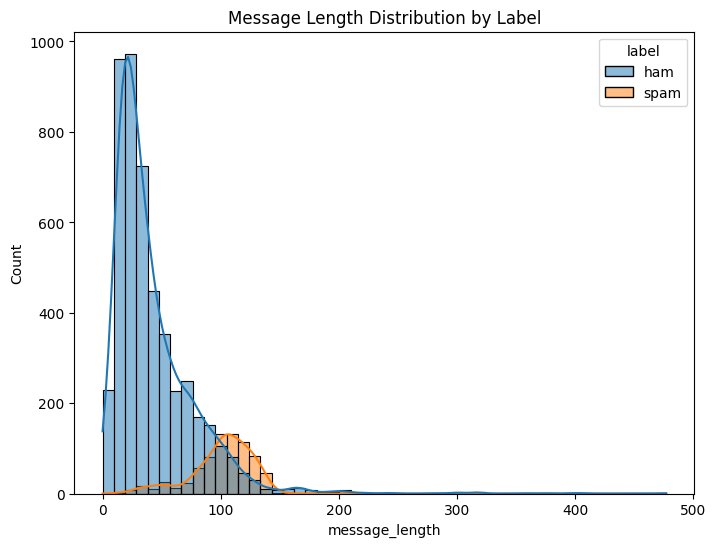

In [24]:
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Function to preprocess the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuations
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    # Apply stemming
    stemmer = SnowballStemmer("english")
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

df['message'] = df['message'].apply(preprocess_text)

# Visualize the length of messages
df['message_length'] = df['message'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df, x='message_length', hue='label', bins=50, kde=True)
plt.title('Message Length Distribution by Label')
plt.show()


# Selecting features and labels

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['message']).toarray()
y = df['label']

# Building the model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

# Evaluating the model

Accuracy: 0.9721973094170404

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



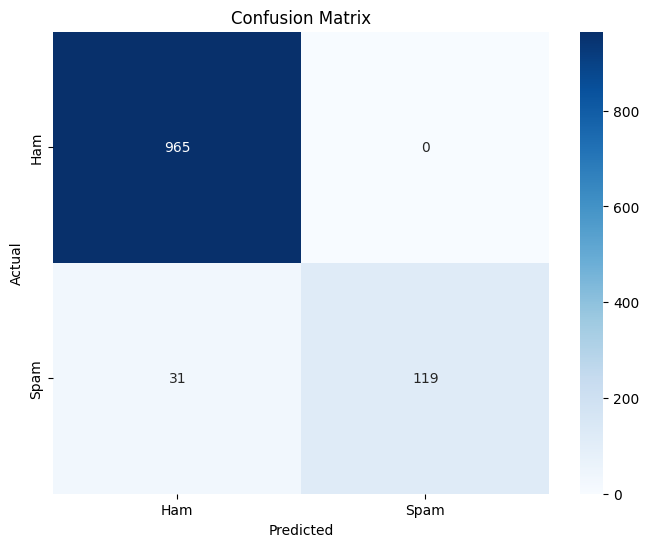

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues', 
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Predictions
print(clf.predict(tfidf.transform(["Hi, how are you?"])))
print(clf.predict(tfidf.transform(["Hey, are you coming for dinner tonight?"])))
print(clf.predict(tfidf.transform(["You have been selected for a 1000$ reward! Text WON to 44255 to claim your reward."])))

['ham']
['ham']
['spam']
